<a href="https://colab.research.google.com/github/AimanFariz/copa-america-analysis/blob/main/Statsbombpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install relevant packages
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
# free_comps
season_sorted = free_comps.sort_values(by='season_name', ascending = False)
season_sorted

#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id, season id
#competition_id=55, season_id=282
# euro_2024_matches = sb.matches(competition_id=55, season_id=282)
copaamerica_2024_matches = sb.matches(competition_id=223, season_id=282)

#print the first 5 matches listed
# euro_2024_matches.head(5)
copaamerica_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3943077,2024-07-15,04:15:00.000,South America - Copa America,2024,Argentina,Colombia,1,0,available,...,None,6,Final,Hard Rock Stadium,Raphael Claus,Lionel Sebastián Scaloni,Néstor Gabriel Lorenzo,1.1.0,2,2
1,3943076,2024-07-14,03:00:00.000,South America - Copa America,2024,Canada,Uruguay,2,2,available,...,None,6,3rd Place Final,Bank of America Stadium,Alexis Herrera,Jesse Marsch,Marcelo Alberto Bielsa Caldera,1.1.0,2,2
2,3942852,2024-07-11,03:00:00.000,South America - Copa America,2024,Uruguay,Colombia,0,1,available,...,None,5,Semi-finals,Bank of America Stadium,César Arturo Ramos Palazuelos,Marcelo Alberto Bielsa Caldera,Néstor Gabriel Lorenzo,1.1.0,2,2
3,3942785,2024-07-10,03:00:00.000,South America - Copa America,2024,Argentina,Canada,2,0,available,...,None,5,Semi-finals,MetLife Stadium,Piero Maza Gomez,Lionel Sebastián Scaloni,Jesse Marsch,1.1.0,2,2
4,3942416,2024-07-07,01:00:00.000,South America - Copa America,2024,Colombia,Panama,5,0,available,...,None,4,Quarter-finals,State Farm Stadium,Maurizio Mariani,Néstor Gabriel Lorenzo,Thomas Christiansen Tarín,1.1.0,2,2


In [ ]:
#create a variable for the team you want to look into
team="Uruguay"

#filter for only matches that the focus team played in
# matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]
matches_df = copaamerica_2024_matches[(copaamerica_2024_matches['home_team'] == team)|(copaamerica_2024_matches['away_team'] == team)]


#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)
matches_df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3943076,2024-07-14,03:00:00.000,South America - Copa America,2024,Canada,Uruguay,2,2,available,...,None,6,3rd Place Final,Bank of America Stadium,Alexis Herrera,Jesse Marsch,Marcelo Alberto Bielsa Caldera,1.1.0,2,2
2,3942852,2024-07-11,03:00:00.000,South America - Copa America,2024,Uruguay,Colombia,0,1,available,...,None,5,Semi-finals,Bank of America Stadium,César Arturo Ramos Palazuelos,Marcelo Alberto Bielsa Caldera,Néstor Gabriel Lorenzo,1.1.0,2,2
5,3942415,2024-07-07,04:00:00.000,South America - Copa America,2024,Uruguay,Brazil,0,0,available,...,None,4,Quarter-finals,Allegiant Stadium,Darío Herrera,Marcelo Alberto Bielsa Caldera,Dorival Silvestre Júnior,1.1.0,2,2
15,3939990,2024-07-02,04:00:00.000,South America - Copa America,2024,United States,Uruguay,0,1,available,...,None,3,Group Stage,Arrowhead Stadium,Kevin Ortega,Gregg Berhalter,Marcelo Alberto Bielsa Caldera,1.1.0,2,2
20,3939982,2024-06-28,04:00:00.000,South America - Copa America,2024,Uruguay,Bolivia,5,0,available,...,None,2,Group Stage,MetLife Stadium,Juan Gabriel Benítez,Marcelo Alberto Bielsa Caldera,Antônio Carlos Zago,1.1.0,2,2
7,3939973,2024-06-24,04:00:00.000,South America - Copa America,2024,Uruguay,Panama,3,1,available,...,None,1,Group Stage,Hard Rock Stadium,Piero Maza Gomez,Marcelo Alberto Bielsa Caldera,Thomas Christiansen Tarín,1.1.0,2,2


Processing match_id: 3942229
Events data processed for match_id: 3942229
Processing match_id: 3939987
Events data processed for match_id: 3939987
Processing match_id: 3939979
Events data processed for match_id: 3939979
Processing match_id: 3939972
Events data processed for match_id: 3939972


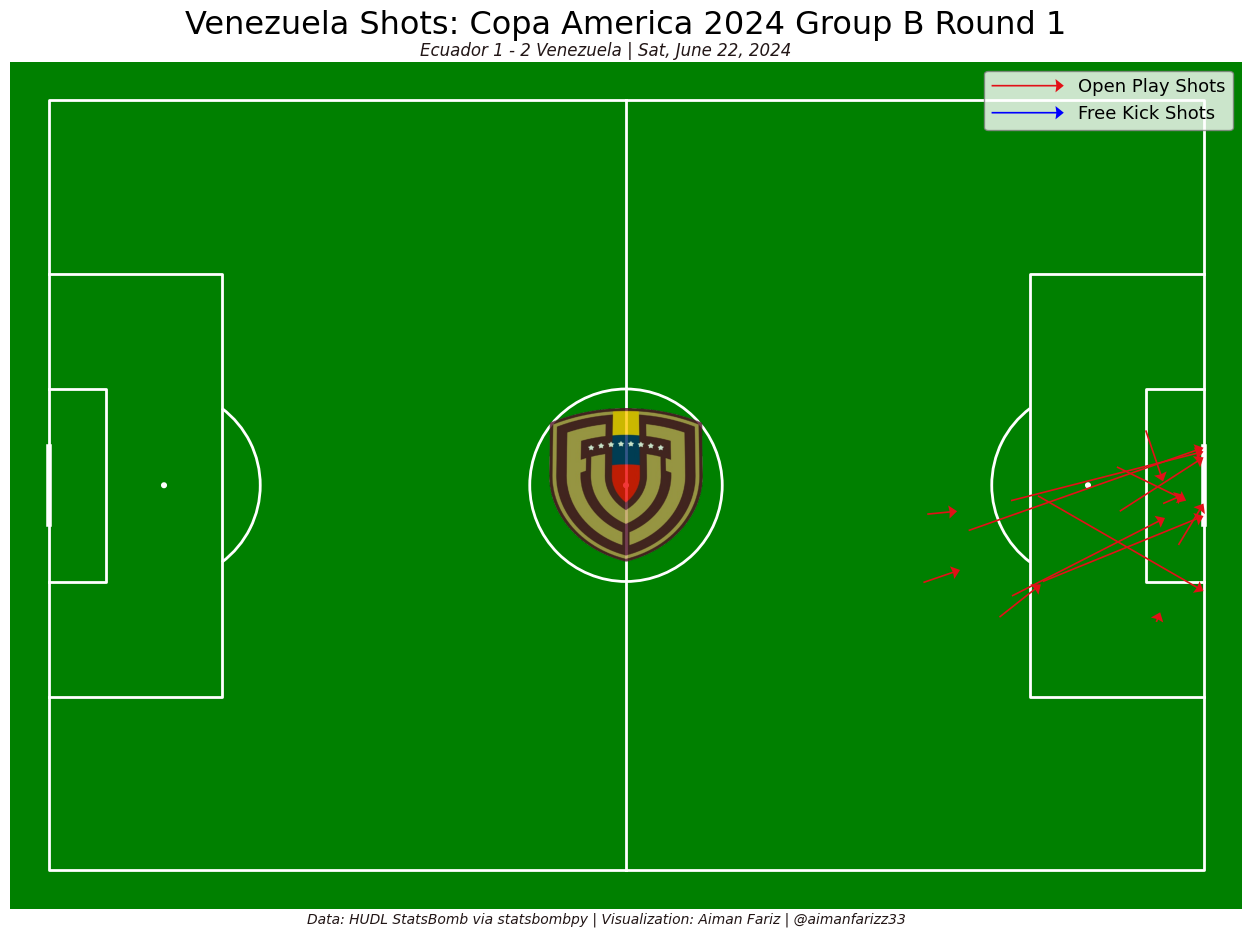

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import seaborn as sns
team="Venezuela"
round = "Group B Round 1"
#filter for only matches that the focus team played in
# matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]
matches_df = copaamerica_2024_matches[(copaamerica_2024_matches['home_team'] == team)|(copaamerica_2024_matches['away_team'] == team)]


#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

# Create a dictionary to store events DataFrames for each match_id
events_data = {}

for match_id in matches_df['match_id']:
    print(f"Processing match_id: {match_id}")

    # Fetch events data for the current match_id
    match_events = sb.events(match_id=match_id)
    events_data[match_id] = match_events  # Store the DataFrame in the dictionary

    # Separate start and end locations from coordinates if columns exist
    if 'location' in match_events.columns:
        events_data[match_id][['x', 'y']] = match_events['location'].apply(pd.Series)
    if 'shot_end_location' in match_events.columns:
        events_data[match_id][['shot_end_x', 'shot_end_y']] = (
            match_events['shot_end_location']
            .dropna()
            .apply(lambda loc: loc[:2] if len(loc) >= 2 else [None, None])
            .apply(pd.Series)
        )
    if 'pass_end_location' in match_events.columns:
        events_data[match_id][['pass_end_x', 'pass_end_y']] = match_events['pass_end_location'].apply(pd.Series)
    if 'carry_end_location' in match_events.columns:
        events_data[match_id][['carry_end_x', 'carry_end_y']] = match_events['carry_end_location'].apply(pd.Series)

    print(f"Events data processed for match_id: {match_id}")

# Accessing the first match DataFrame
first_match_id = matches_df['match_id'].iloc[3]
first_match_events = events_data[first_match_id]  # Retrieve the DataFrame

# Display the first match DataFrame
# first_match_events

#visualise shooting for teams
shot_color='#e21017'

team__open_play_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Open Play")&(first_match_events.team==team)]
team__fk_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Free Kick")&(first_match_events.team==team)]

team__open_play_shots

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_zorder=2, line_color='white')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# #plot the open play shots
pitch.arrows(team__open_play_shots.x, team__open_play_shots.y,
team__open_play_shots.shot_end_x, team__open_play_shots.shot_end_y, width=1.2,
headwidth=8, headlength=5, color=shot_color, ax=ax, zorder=2, label = "Open Play Shots")
# #plot the free kick shots
pitch.arrows(team__fk_shots.x, team__fk_shots.y,
team__fk_shots.shot_end_x, team__fk_shots.shot_end_y, width=1.2,
headwidth=8, headlength=5, color="blue", ax=ax, zorder=1, label = "Free Kick Shots")

# logo_url = "https://i.pinimg.com/originals/81/e3/44/81e344ee1e8764ab80ffa67b4e3b77ba.png"
# response = requests.get(logo_url)
# if response.status_code == 200:
#     logo = Image.open(BytesIO(response.content)).rotate(180).transpose(Image.FLIP_LEFT_RIGHT)
# else:
#     print(f"Failed to fetch the logo. HTTP Status Code: {response.status_code}")

# this one's for ecuador and venezuela
logo_path = "/content/Logotipo_de_la_Federación_Venezolana_de_Fútbol.svg-removebg-preview.png"
logo = Image.open(logo_path).rotate(180).transpose(Image.FLIP_LEFT_RIGHT)

# Add the team logo at the center of the pitch
center_x, center_y = 60, 40  # Coordinates for the center of the pitch (StatsBomb dimensions)
ax.imshow(
    logo, extent=(center_x - 8, center_x + 8, center_y - 8, center_y + 8),
    zorder=3, alpha=0.8  # Adjust the alpha for transparency if needed
)
#plot the legend
ax.legend(facecolor='white', handlelength=4, edgecolor='gray', frameon=True, fontsize=13, loc='best')

#set title of viz
ax_title = ax.set_title(f'{team} Shots: Copa America 2024 {round}', fontsize=23,color='black', pad = 20)
fig.text(
    0.5, 0.89,  # Positioning the subtitle relative to the axes
    f'Ecuador 1 - 2 {team} | Sat, June 22, 2024',  # Subtitle text
    ha='center', va='center', fontsize=12, color='#221616', fontstyle='italic'
)
fig.text(
    0.5, 0.1,  # Adjust Y-position slightly below the figure
    "Data: HUDL StatsBomb via statsbombpy | Visualization: Aiman Fariz | @aimanfarizz33",
    ha='center', va='center', fontsize=10, color='#221616', fontstyle='italic'
)

# Save the figure to ensure footer appears in the saved image
fig.savefig(f"{team}_shots {round}.png", dpi=300, bbox_inches="tight")



Processing match_id: 3939988
Processing match_id: 3939979
Processing match_id: 3939971
Total Pass for Mexico: 1549


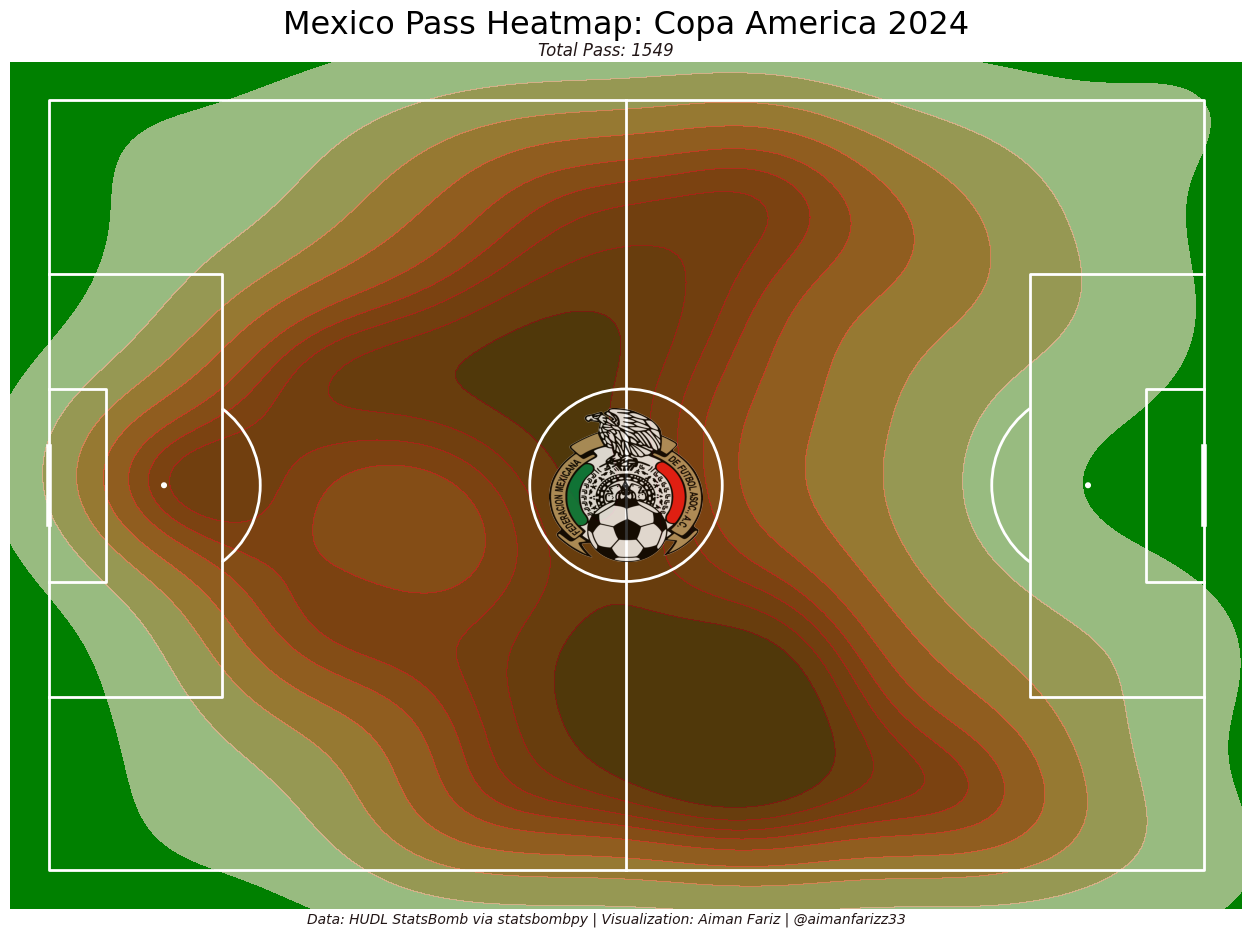

In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from mplsoccer import Pitch
import seaborn as sns
import matplotlib.pyplot as plt

team = "Mexico"
event_type = "Pass"

# Filter and combine all rounds
matches_df = copaamerica_2024_matches[
    (copaamerica_2024_matches['home_team'] == team) |
    (copaamerica_2024_matches['away_team'] == team)
]
matches_df = matches_df.sort_values(by='match_date', ascending=False)

# Combine shot data for all matches
all_shots = pd.DataFrame()
for match_id in matches_df['match_id']:
    print(f"Processing match_id: {match_id}")
    match_events = sb.events(match_id=match_id)

    if 'location' in match_events.columns:
        match_events[['x', 'y']] = match_events['location'].apply(pd.Series)

    # Filter shots for the team
    team_shots = match_events[(match_events['type'] == f"{event_type}") & (match_events['team'] == team)]
    all_shots = pd.concat([all_shots, team_shots])

print(f"Total {event_type} for {team}: {len(all_shots)}")

# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# Plot the heatmap of shots
sns.kdeplot(
    x=all_shots['x'],
    y=all_shots['y'],
    ax=ax, fill=True, alpha=0.6, cmap="Reds", zorder=0
)

# Add the team logo
logo_url = "https://i.pinimg.com/originals/b3/d1/e2/b3d1e2867ec0abdb5baf58c06c30715a.png"
response = requests.get(logo_url)
if response.status_code == 200:
    logo = Image.open(BytesIO(response.content)).rotate(180).transpose(Image.FLIP_LEFT_RIGHT)
    center_x, center_y = 60, 40  # Center of pitch
    ax.imshow(logo, extent=(center_x - 8, center_x + 8, center_y - 8, center_y + 8), zorder=3, alpha=0.8)
else:
    print(f"Failed to fetch the logo. HTTP Status Code: {response.status_code}")

# logo_path = "/content/Logotipo_de_la_Federación_Venezolana_de_Fútbol.svg-removebg-preview.png"
# logo = Image.open(logo_path).rotate(180).transpose(Image.FLIP_LEFT_RIGHT)
# center_x, center_y = 60, 40  # Center of pitch
# ax.imshow(logo, extent=(center_x - 8, center_x + 8, center_y - 8, center_y + 8), zorder=3, alpha=0.8)

# Title and Footer
ax_title = ax.set_title(f'{team} {event_type} Heatmap: Copa America 2024', fontsize=23, color='black', pad=20)
fig.text(
    0.5, 0.1,
    "Data: HUDL StatsBomb via statsbombpy | Visualization: Aiman Fariz | @aimanfarizz33",
    ha='center', va='center', fontsize=10, color='#221616', fontstyle='italic'
)
fig.text(
    0.5, 0.89,  # Positioning the subtitle relative to the axes
    f"Total {event_type}: {len(all_shots)}",  # Subtitle text
    ha='center', va='center', fontsize=12, color='#221616', fontstyle='italic'
)
# Save the figure
fig.savefig(f"{team}_{event_type}_heatmap_copa.png", dpi=300, bbox_inches="tight")


In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from mplsoccer import Pitch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

team = "Uruguay"
event_type = "Pass"

# Filter and combine all rounds
matches_df = copaamerica_2024_matches[
    (copaamerica_2024_matches['home_team'] == team) |
    (copaamerica_2024_matches['away_team'] == team)
]
matches_df = matches_df.sort_values(by='match_date', ascending=False)

# Combine shot data for all matches
all_shots = pd.DataFrame()
formation_data = []

for match_id in matches_df['match_id']:
    print(f"Processing match_id: {match_id}")
    match_events = sb.events(match_id=match_id)

    if 'location' in match_events.columns:
        match_events[['x', 'y']] = match_events['location'].apply(pd.Series)

    # Filter shots for the team
    team_shots = match_events[(match_events['type'] == f"{event_type}") & (match_events['team'] == team)]
    all_shots = pd.concat([all_shots, team_shots])

    # Extract tactics data for the team
    team_tactics = match_events[(match_events['type'] == 'Tactics') & (match_events['team'] == team)]
    for _, row in team_tactics.iterrows():
        if isinstance(row['tactics'], dict) and 'lineup' in row['tactics']:
            for player in row['tactics']['lineup']:
                formation_data.append({
                    'player_name': player['name'],
                    'position_name': player['position']['name'],
                    'x': player['position']['x'],
                    'y': player['position']['y']
                })

# Convert formation data to DataFrame
formation_df = pd.DataFrame(formation_data)

# Calculate average positions
average_positions = formation_df.groupby('player').mean()

# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# Plot the heatmap of shots
sns.kdeplot(
    x=all_shots['x'],
    y=all_shots['y'],
    ax=ax, fill=True, alpha=0.6, cmap="Reds", zorder=0
)

# Plot average formation
for _, row in average_positions.iterrows():
    ax.scatter(row['x'], row['y'], s=200, color='blue', edgecolor='black', zorder=3)
    ax.text(row['x'], row['y'], row.name, color='white', ha='center', va='center', fontsize=8, zorder=4)

# Add the team logo
logo_url = "https://images.vexels.com/media/users/3/152681/isolated/preview/6a0f68291b3109113e2231045202ef55-uruguay-football-team-logo.png"
response = requests.get(logo_url)
if response.status_code == 200:
    logo = Image.open(BytesIO(response.content)).rotate(180).transpose(Image.FLIP_LEFT_RIGHT)
    center_x, center_y = 60, 40  # Center of pitch
    ax.imshow(logo, extent=(center_x - 8, center_x + 8, center_y - 8, center_y + 8), zorder=3, alpha=0.8)
else:
    print(f"Failed to fetch the logo. HTTP Status Code: {response.status_code}")

# Title and Footer
ax_title = ax.set_title(f'{team} {event_type} Heatmap & Formation: Copa America 2024', fontsize=23, color='black', pad=20)
fig.text(
    0.5, 0.1,
    "Data: HUDL StatsBomb via statsbombpy | Visualization: Aiman Fariz | @aimanfarizz33",
    ha='center', va='center', fontsize=10, color='#221616', fontstyle='italic'
)
fig.text(
    0.5, 0.89,  # Positioning the subtitle relative to the axes
    f"Total {event_type}: {len(all_shots)}",  # Subtitle text
    ha='center', va='center', fontsize=12, color='#221616', fontstyle='italic'
)

# Save the figure
fig.savefig(f"{team}_{event_type}_heatmap_and_formation_copa.png", dpi=300, bbox_inches="tight")


Processing match_id: 3943076
Processing match_id: 3942852
Processing match_id: 3942415
Processing match_id: 3939990
Processing match_id: 3939982
Processing match_id: 3939973


KeyError: 'player'

In [ ]:
print(matches_df['match_id'].iloc[0])
events_data[matches_df['match_id'].iloc[0]].columns.unique()
# tactic = events_data[matches_df['match_id'].iloc[0]]['tactics']

3943076


Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       

In [ ]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
# f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]
open_play_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Open Play")]


#get count for each player
open_play_shots=open_play_shots.groupby('player').size().reset_index()
open_play_shots

,player,0
0,Abdiel Armando Ayarza Cocanegra,1
1,Chris Richards,2
2,Christian Jesús Martinez,1
3,César Rodolfo Blackman Camarena,3
4,Edgar Yoel Bárcenas Herrera,3
5,Edgardo Isaac Fariña Wynter,2
6,Eduardo Antonio Guerrero Lozcano,1
7,Folarin Balogun,2
8,José Fajardo Nelson,1
9,Michael Amir Murillo Bermudez,1


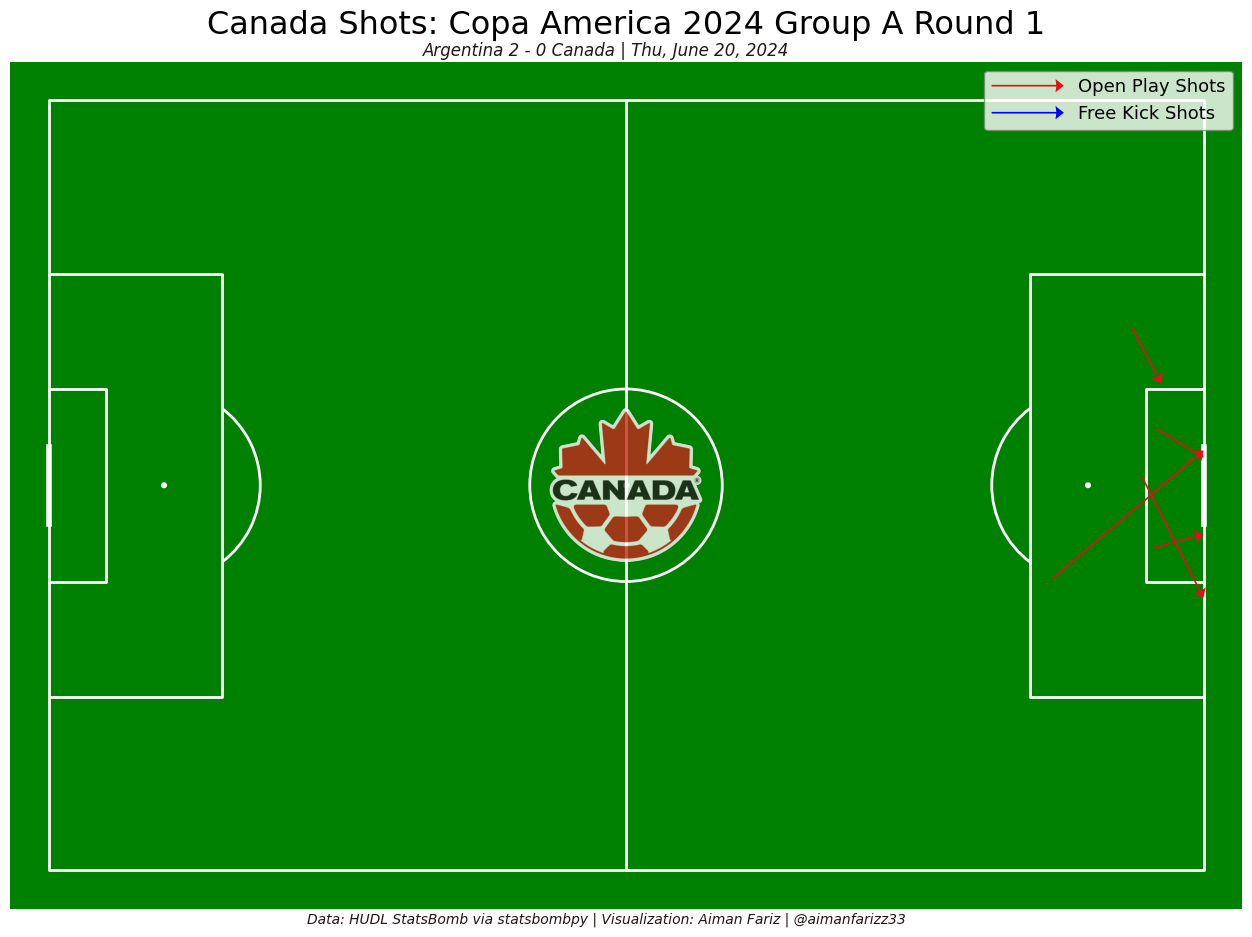

In [ ]:
import requests
from PIL import Image
from io import BytesIO
#visualise shooting for teams
team="Canada"
shot_color='#e21017'

team__open_play_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Open Play")&(first_match_events.team==team)]
team__fk_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Free Kick")&(first_match_events.team==team)]

team__open_play_shots

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_zorder=2, line_color='white')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# #plot the open play shots
pitch.arrows(team__open_play_shots.x, team__open_play_shots.y,
team__open_play_shots.shot_end_x, team__open_play_shots.shot_end_y, width=1.2,
headwidth=8, headlength=5, color=shot_color, ax=ax, zorder=2, label = "Open Play Shots")
# #plot the free kick shots
pitch.arrows(team__fk_shots.x, team__fk_shots.y,
team__fk_shots.shot_end_x, team__fk_shots.shot_end_y, width=1.2,
headwidth=8, headlength=5, color="blue", ax=ax, zorder=1, label = "Free Kick Shots")

logo_url = "https://logodownload.org/wp-content/uploads/2021/10/canada-soccer-team-logo-1.png"
response = requests.get(logo_url)
if response.status_code == 200:
    logo = Image.open(BytesIO(response.content)).rotate(180).transpose(Image.FLIP_LEFT_RIGHT)
else:
    print(f"Failed to fetch the logo. HTTP Status Code: {response.status_code}")
# #plot the carries
# pitch.arrows(player_carries.x, player_carries.y,
# player_carries.carry_end_x, player_carries.carry_end_y, width=3,
# headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")
# Add the team logo at the center of the pitch
center_x, center_y = 60, 40  # Coordinates for the center of the pitch (StatsBomb dimensions)
ax.imshow(
    logo, extent=(center_x - 8, center_x + 8, center_y - 8, center_y + 8),
    zorder=3, alpha=0.8  # Adjust the alpha for transparency if needed
)
#plot the legend
ax.legend(facecolor='white', handlelength=4, edgecolor='gray', frameon=True, fontsize=13, loc='best')

#set title of viz
ax_title = ax.set_title(f'{team} Shots: Copa America 2024 Group A Round 1', fontsize=23,color='black', pad = 20)
fig.text(
    0.5, 0.89,  # Positioning the subtitle relative to the axes
    'Argentina 2 - 0 Canada | Thu, June 20, 2024',  # Subtitle text
    ha='center', va='center', fontsize=12, color='#221616', fontstyle='italic'
)
fig.text(
    0.5, 0.1,  # Adjust Y-position slightly below the figure
    "Data: HUDL StatsBomb via statsbombpy | Visualization: Aiman Fariz | @aimanfarizz33",
    ha='center', va='center', fontsize=10, color='#221616', fontstyle='italic'
)

# Save the figure to ensure footer appears in the saved image
fig.savefig(f"{team}_shots_copa_america_1.png", dpi=300, bbox_inches="tight")



In [ ]:
#print a list of columns available in the event data
first_match_events.columns

,timestamp
0,00:00:00.000
1,00:00:00.000
2,00:00:00.000
3,00:00:00.000
4,00:00:00.000
...,...
2901,00:49:34.363
2902,00:52:36.639
2903,00:52:36.639
2904,00:11:44.071


In [ ]:
#separate start and end locations from coordinates
# events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
# events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
# events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [ ]:
first_match_events.shot_outcome.unique()

array([nan, 'Blocked', 'Goal', 'Off T', 'Saved', 'Wayward', 'Post',
       'Saved to Post'], dtype=object)

In [ ]:
# Extract 'shot_end_location' coordinates into separate columns
if 'shot_end_location' in events_df[0].columns:
    events_df[0][['location_x', 'location_y']] = events_df[0]['shot_end_location'].apply(pd.Series)

# Get unique shot end locations
unique_shot_end_locations = events_df[0][['shot_end_x', 'shot_end_y']].drop_duplicates()

print(unique_shot_end_locations)


NameError: name 'events_df' is not defined

In [ ]:
#rename second column
open_play_shots.rename(columns={f3rd_passes_count.columns[1]: "Open Play Shots" }, inplace = True)
# open_play_shots.sort_values(by='Open Play Shots', ascending=False, inplace=True)
open_play_shots

NameError: name 'f3rd_passes_count' is not defined

In [ ]:
#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)
f3rd_carries_count

NameError: name 'events_df' is not defined

In [ ]:
#combine dataframes
progressions_df=pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])
#add 0 where value is NaN
progressions_df=progressions_df.fillna(0)
#add a new column with the total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']
progressions_df.sort_values(by='total', ascending=False, inplace=True)
progressions_df

In [ ]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
progressions_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

In [ ]:
#visualise for a given player
player_name="Alexis Mac Allister"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')

NameError: name 'f3rd_passes' is not defined

In [ ]:
# team__open_play_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Open Play")&(first_match_events.team==team)]
team_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.team==team)]
team_fk_shots=first_match_events[(first_match_events.type=="Shot")&(first_match_events.shot_type=="Free Kick")&(first_match_events.team==team)]
# team__open_play_shots
team_fk_shots
# team_shots

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,type,under_pressure,x,y,shot_end_x,shot_end_y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
3593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shot,NaN,94.8,24.9,104.2,29.3,NaN,NaN,NaN,NaN
